<a href="https://colab.research.google.com/github/probabll/ntmi-tutorials/blob/main/HC1b-prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt

# Discrete probability distributions

**Random variable**

If $X$ is a random variable with range $\mathcal X$ and distribution $P_X$, then $P_X(X=x)$ is the probability that $X$ takes on the value $x \in \mathcal X$. The *range* of a random variable is the set of values it can take on. It is common to refer to the range as the random variable's sample space (though technically speaking this is a slight abuse of terminology). 

**Probability distribution**

For any probability distribution, $\forall x \in \mathcal X$ is holds that  $0 \le P_X(X=x) \le 1$ and $\sum_{x \in \mathcal X} P_X(X=x) = 1$. 

The notation $\forall x \in \mathcal X$ is pronounced "for all $x$ in the range of the random variable $X$".

The set $\mathrm{supp}(P_X)$ is the *support* of the distribution, that is, the subset of $\mathcal X$ for which $P_X(X=x)>0$.

**Cumulative distribution function**

For a random variable $X$ with distribution $P_X$, the cumulative distribution function (cdf) is the function $F_X(a) = \sum_{x \le a} P_X(X=x)$. 
Because probability values are never negative, the cdf is increasing and monotone. 

The cdf plays an important role in sampling algorithms. In particular, if we draw $X$ from $P_X$ and evaluate the cdf, the distribution of the result is uniform over the interval $[0, 1]$. That is, $F_X(X) \sim \mathcal U(0, 1)$. Conversely, if $U$ is uniformly distributed over $[0,1]$, denoted $U\sim \mathcal U(0, 1)$, transforming $U$ through the inverse cdf $F^{-1}_X$, also known as *quantile function*, gives us a random variable $X$ with distribution $P_X$.

**Probability mass function** 

We often specify a probability distribution via a parametric function that relates the mass of an outcome to the outcome itself and a set of numerical parameters. The probability mass function (pmf) is a useful device to specify probability distributions through general mathematical laws (functions), rather than one probability value at a time. We normally name the pmf for convenience. 

For example, $f_\theta(x) = \theta^x(1-\theta)^{1-x}$ is the pmf of a binary random variable that takes the value 1 with probability $\theta$, and the value 0 with probability $1-\theta$. The probability distribution $P_X$ such that $P_X(X=x)=f_\theta(x)$ also goes by the name of Bernoulli distribution. 

Standard probability distributions are usually "named", which helps us remember the pmfs that prescribe them. We will see some examples later.

**Expected value**

The expected value (or mean) of a random variable is denoted $\mathbb E[X]$ and defined as $\mathbb E[X] = \sum_{x \in \mathrm{supp}(p_X)} x P_X(X=x)$. 

**Variance**

The variance of a random variable is denoted $\mathrm{Var}(X)$ and defined as $\mathbb E[(X - \mathbb E[X])^2] = \mathbb E[X^2] - \mathbb E[X]^2$.

**Mode**

The modes of a random variable $X$ are the values $x \in \mathcal X$ for which $P_X(X=x)$ is maximum.



## Bernoulli

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is the discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $1-p$.

**Notation** If $X \sim \mathrm{Bernoulli}(p)$, then $P_X(X=x) = \mathrm{Bernoulli}(x|p)$ where
\begin{equation}
  \mathrm{Bernoulli}(x|p) = \begin{cases}
  p & x=1\\
  1-p & x=0\\
  0 & \text{otherwise} 
  \end{cases}
\end{equation}  
is the Bernoulli probability mass function (pmf).

**Properties**

* Support: $\{0, 1\}$
* Mean: $\mathbb E[X] = p$
* Variance: $\mathrm{var}(X)= \mathbb E[X]^2 - \mathbb E[X^2]=p(1-p)$
* Mode(s): $1$ if $p > 0.5$, $0$ if $p < 0.5$, $\{0, 1\}$ if $p=0.5$

Bernoulli pmf and cdf using scipy:

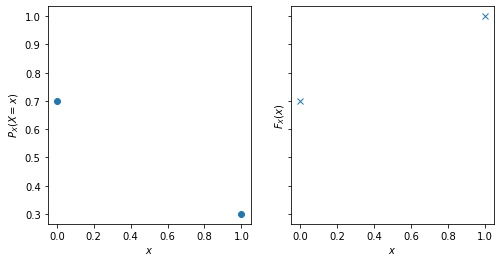

In [2]:
bern = st.bernoulli(0.3)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot([0, 1], bern.pmf([0, 1]), 'o')
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot([0, 1], bern.cdf([0, 1]), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

Drawing samples from Bernoulli using scipy:

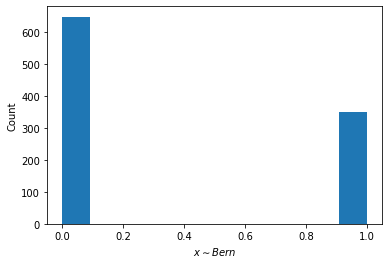

In [3]:
_ = plt.hist(bern.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$x \sim Bern$')
_ = plt.ylabel('Count')

## Categorical

The [Categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) is the discrete probability distribution of a random variable that can take on one of $K$ possible categories, with the probability of each category separately specified. 

**Notation** If $X \sim \mathrm{Categorical}(\pi_1, \ldots, \pi_K)$, then $P_X(X=x) = \mathrm{Categorical}(x|\pi_1, \ldots, \pi_K)$ where $\pi_k \ge 0$, $\sum_{k=1}^K \pi_k = 1$ and
\begin{equation}
  \mathrm{Categorical}(x|\pi_{1}, \ldots, \pi_K) = \begin{cases}
  \pi_x & x \in \{1, \ldots, K\} \\  
  0 & \text{otherwise} 
  \end{cases}
\end{equation}  
is the Categorical pmf. Other common notations: $X \sim \mathrm{Categorical}(\pi_{1:K})$, $X \sim \mathrm{Categorical}(\pi_1^K)$, and $X \sim \mathrm{Categorical}(\boldsymbol\pi)$ with $\boldsymbol\pi \in \Delta_{K-1}$. 

The set $\Delta_{K-1} \subset \mathbb R^K$ is called the *probability simplex*, it is the set of $K$-dimensional vectors whose coordinates are positive and sum to 1.

**Properties**

* Support: $\{1, \ldots, K\}$
* Mean: undefined (Categorical outcomes are normally not interpreted as ordinal values)
* Variance: undefined (Categorical outcomes are normally not interpreted as ordinal values)
* Mode(s): $\{k: \pi_k = \max(\pi_1, \ldots, \pi_K)\} \subseteq \{1, \ldots, K\}$

We will make our own Categorical object imitating the scipy API:

In [4]:
class Categorical:
    
    def __init__(self, probs):
        self._probs = np.array(probs)
        assert self._probs.size > 1, "We need 2 or more classes"
        assert self._probs.shape == (self._probs.size,), "probs must be a vector"
        assert np.all(self._probs >= 0), "The coordinates of the Categorical parameter must be positve"
        assert self._probs.sum() == 1, "The coordinates of the Categorical parameter must add to 1"
        
    def rvs(self, size=None):
        """Use this to draw 1 or more samples from the distribution"""
        # we shift by one because random.choice returns 0-based outcomes
        return np.random.choice(len(self._probs), p=self._probs, size=size) + 1

    def pmf(self, x):        
        """Use this to assess the probability mass of the elements of a data vector"""
        x = np.array(x, dtype=int) - 1 # convert to 0-based
        return self._probs[x]
    
    def logpmf(self, x):
        """Use this to assess the logarithm of the probability mass of the elements of a data vector"""
        x = np.array(x, dtype=int) - 1 # covert to 0-based
        return np.log(self._probs[x])

    def cdf(self, x):
      if type(x) is int:
        return self._probs[:x].sum()
      else:
        x = np.array(x, dtype=int) - 1. # convert to 0-based      
        # flags
        b = x[:, None] >= np.arange(self._probs.size)[None, :]
        # cdf
        return (b * self._probs).sum(-1)

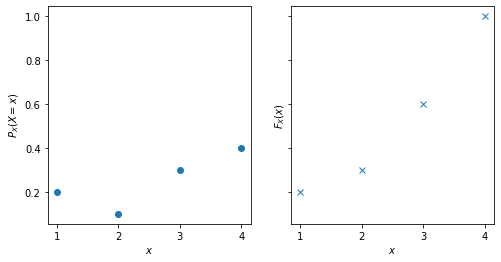

In [5]:
cat = Categorical([0.2, 0.1, 0.3, 0.4])
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot([1, 2, 3, 4], cat.pmf([1, 2, 3, 4]), 'o')
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot([1, 2, 3, 4], cat.cdf([1, 2, 3, 4]), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

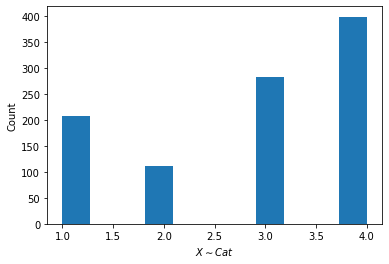

In [6]:
_ = plt.hist(cat.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$X \sim Cat$')
_ = plt.ylabel('Count')

## Binomial

The [Binomial distribution](https://en.m.wikipedia.org/wiki/Binomial_distribution) with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of $n$ independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). 

**Notation** If $X \sim \mathrm{Binomial}(n, p)$, then $P_X(X=x) = \mathrm{Binomial}(x|n, p)$ where $n > 0$, $0 \le p \le 1$ and
\begin{equation}
  \mathrm{Binomial}(x|n, p) = \begin{cases}
  \binom{n}{x} p^x(1-p)^{n-x}& x \in \{0, \ldots, n\} \\  
  0 & \text{otherwise} 
  \end{cases}
\end{equation}  
is the Binomial pmf.

$\binom{n}{x} = \frac{n!}{x!(n-x)!}$, pronounced $n$-choose-$k$, is the binomial coefficient.

**Properties**

* Support: $\{0, \ldots, n\}$
* Mean: $\mathbb E[X] = np$
* Variance: $\mathrm{var}(X)= \mathbb E[X]^2 - \mathbb E[X^2]=np(1-p)$
* Mode(s): $\lfloor (n+1)p \rfloor$ or $\lceil (n+1)p\rceil -1 $



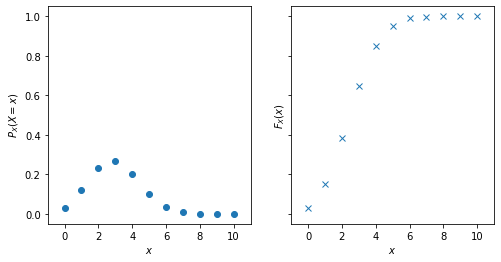

In [7]:
binom = st.binom(10, 0.3)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot(np.arange(11), binom.pmf(np.arange(11)), 'o')
_ = ax[0].set_xlim((-1, 11))
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot(np.arange(11), binom.cdf(np.arange(11)), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

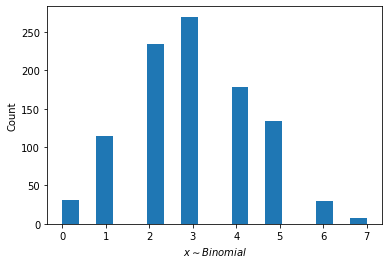

In [8]:
_ = plt.hist(binom.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$x \sim Binomial$')
_ = plt.ylabel('Count')

## Geometric

The [Geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution) is either one of two discrete probability distributions:

* The probability distribution of the number $X$ of Bernoulli trials needed to get one success, supported on the set $\{1, 2, \ldots\}$. In this case $P_X(X=x)$ is given by the pmf:
\begin{equation}
  \mathrm{Geometric}_1(x|p) = \begin{cases}
  p(1-p)^{x-1} & x \in \{1,2, \ldots\} \\  
  0 & \text{otherwise} 
  \end{cases}
\end{equation}  
with $p > 0$.

  * Support: $\{1, 2, \ldots \}$
  * Mean: $\frac{1}{p}$
  * Variance: $\frac{1-p}{p^2}$
  * Mode: 1

* The probability distribution of the number $Y = X - 1$ of failures before the first success, supported on the set $\{0, 1, \ldots\}$. In this case $P_Y(Y=y)$ is given by the pmf
\begin{equation}
  \mathrm{Geometric}_0(y|p = \begin{cases}
  p(1-p)^{y} & x \in \{0, 1, \ldots\} \\  
  0 & \text{otherwise} 
  \end{cases}
\end{equation} 
with $p > 0$.

  * Support: $\{0, 1, \ldots \}$
  * Mean: $\frac{1-p}{p}$
  * Variance: $\frac{1-p}{p^2}$
  * Mode: 0

Scipy's default Geometric is Geometric1:

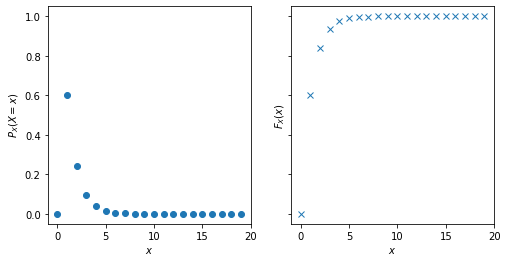

In [9]:
geom1 = st.geom(0.6)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot(np.arange(20), geom1.pmf(np.arange(20)), 'o')
_ = ax[0].set_xlim((-1, 20))
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot(np.arange(20), geom1.cdf(np.arange(20)), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

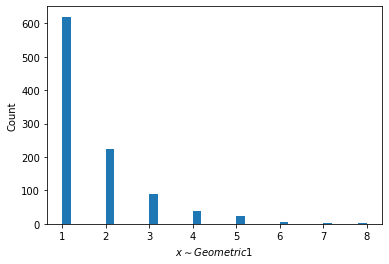

In [10]:
_ = plt.hist(geom1.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$x \sim Geometric1$')
_ = plt.ylabel('Count')

But we can shift it using a so-called location parameter:

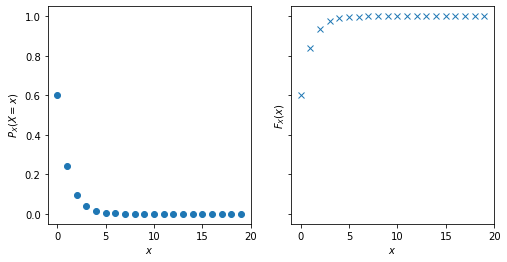

In [11]:
geom0 = st.geom(0.6, loc=-1)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot(np.arange(20), geom0.pmf(np.arange(20)), 'o')
_ = ax[0].set_xlim((-1, 20))
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot(np.arange(20), geom0.cdf(np.arange(20)), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

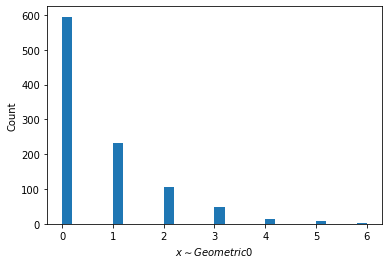

In [12]:
_ = plt.hist(geom0.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$x \sim Geometric0$')
_ = plt.ylabel('Count')

## Poisson

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

**Notation** If $X \sim \mathrm{Poisson}(\lambda)$, then $P_X(X=x) = \mathrm{Poisson}(x|\lambda)$ where $\lambda > 0$ and
\begin{equation}
  \mathrm{Poisson}(x|\lambda) = \begin{cases}
  \frac{\lambda^xe^{-\lambda}}{x!} & x \in \mathbb N_0\\  
  0 & \text{otherwise} 
  \end{cases}
\end{equation}  
is the Poisson pmf. The parameter $\lambda$ is called rate.

**Properties**

* Support: $\mathbb N_0$
* Mean: $\mathbb E[X] = \lambda$
* Variance: $\mathrm{var}(X)= \mathbb E[X]^2 - \mathbb E[X^2]= \lambda$
* Mode(s): $\{ \lceil \lambda \rceil - 1, \lfloor \lambda \rfloor \}$

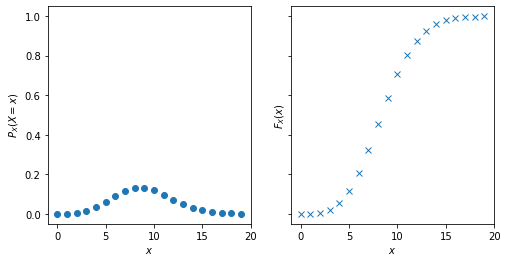

In [13]:
poi = st.poisson(9)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot(np.arange(20), poi.pmf(np.arange(20)), 'o')
_ = ax[0].set_xlim((-1, 20))
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot(np.arange(20), poi.cdf(np.arange(20)), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

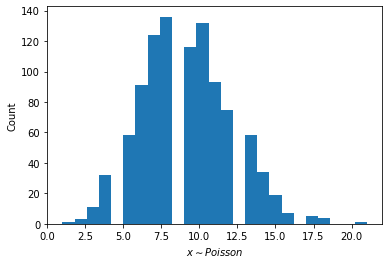

In [14]:
_ = plt.hist(poi.rvs(size=1000), bins='auto')
_ = plt.xlabel(r'$x \sim Poisson$')
_ = plt.ylabel('Count')

## Zipf and Zeta

The [Zipf distribution](https://en.wikipedia.org/wiki/Zipf's_law) and the [Zeta distribution](https://en.wikipedia.org/wiki/Zeta_distribution)
are closely-related distributions that relate the frequency of outcomes and their rank.


Scipy's `zipf` distribution is in fact the Zeta distribution, and that's because the two names are often used interchangeably, even though they are similar power laws they are not identical.

The Zeta distribution is numerically more convenient, it has a single parameter $s>1$ called the *power*, and it supports all natural numbers larger than $0$, while the Zipf has a bounded support $\{1, \ldots, N\}$ where $N$ is the number of trials.

**Notation** If $X \sim \mathrm{Zipf}(s)$ with $s>1$, $P_X(X=x)$ is given by the Zipf pmf:
\begin{equation}
\mathrm{Zipf}(x|N, s) = \frac{1}{k^s H_{N,s}}
\end{equation}
where $H_{N,s}=\sum_{n=1}^N \frac{1}{n^s}$.

* Support: $\mathbb N_1$
* Mean: $\frac{H_{N,s-1}}{H_{N,s}}$
* Variance: see Wikipedia
* Mode: 1

**Notation** If $X \sim \mathrm{Zeta}(s)$ with $s>1$, $P_X(X=x)$ is given by the Zeta pmf:
\begin{equation}
\mathrm{Zipf}(x|s) = \frac{1}{k^s \zeta(s)}
\end{equation}
where $\zeta(s)$ is the [Riemann Zeta function](https://en.wikipedia.org/wiki/Riemann_zeta_function).

* Support: $\mathbb N_1$
* Mean: $\frac{\zeta(s-1)}{\zeta(s)}$
* Variance: see Wikipedia
* Mode: 1

Power law distributions are [heavy-tailed distributions](https://en.wikipedia.org/wiki/Heavy-tailed_distribution) and because of that they usually produce very large outcomes that deviate drammatically from their modes.

The scipy `zipf` is in fact a Zeta distribution:

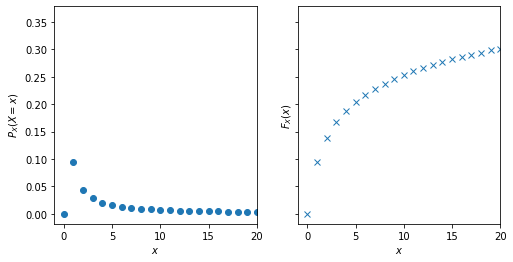

In [15]:
zeta = st.zipf(1.1)
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
_ = ax[0].plot(np.arange(50), zeta.pmf(np.arange(50)), 'o')
_ = ax[0].set_xlim((-1, 20))
_ = ax[0].set_xlabel(r'$x$')
_ = ax[0].set_ylabel(r'$P_X(X=x)$')
_ = ax[1].plot(np.arange(50), zeta.cdf(np.arange(50)), 'x')
_ = ax[1].set_xlabel(r'$x$')
_ = ax[1].set_ylabel(r'$F_X(x)$')

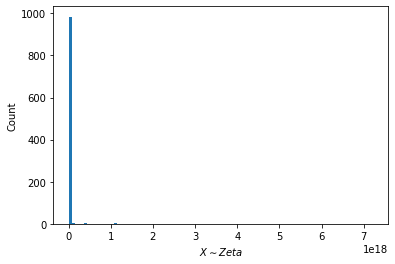

In [16]:
_ = plt.hist(zeta.rvs(size=1000), bins=100)
_ = plt.xlabel(r'$X \sim Zeta$')
_ = plt.ylabel('Count')

The easiest way to recognise a Zipf/Zeta distribution (or a power law in general) is to plot a log-log plot:

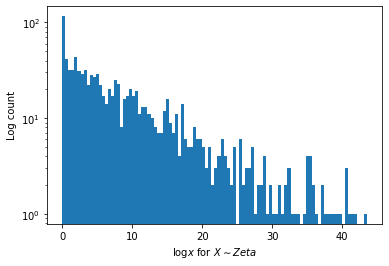

In [17]:
_ = plt.hist(np.log(zeta.rvs(size=1000)), bins=100, log=True)
_ = plt.xlabel(r'$\log x$ for $X \sim Zeta$')
_ = plt.ylabel('Log count')

## Multinomial

The [Multinomial distribution](https://en.wikipedia.org/wiki/Multinomial_distribution) is a generalization of the binomial distribution. It models the probability of counts for each side of a $K$-sided die rolled $n$ times. For $n$ independent trials each of which leads to a success for exactly one of $K$ categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

A multinomial random variable is a *vector-valued* random variable with $K$ dimensions, we denote it $X \sim \mathrm{Multinomial}(n, \pi_{1:K})$ for $\pi_{1:K} \in \Delta_{K-1}$. The probability $P_X(X=x)$ is given by 
\begin{equation}
\mathrm{Multinomial}(x|n, \pi_{1:K}) = \frac{n!}{\prod_{k=1}^K x_k!} \prod_{k=1}^K \pi_k^{x_k}
\end{equation}
for $\{x \in \mathbb N^K: \sum_{k=1}^K x_k = N\}$.

* Support: $\{x \in \mathbb N^K: \sum_{k=1}^K x_k = n\}$, that is, the subset of $K$ dimensional positive count vectors that add to $n$.
* Mean: per coordinate $\mathbb E[X_k] = \pi_k$
* Variance: per coordinate $n\pi_k(1-\pi_k)$


As this is a vector-valued rv, we cannot easily plot its pmf. But we can easily use scipy to obtain draws:

In [18]:
multi = st.multinomial(10, [0.1, 0.2, 0.7])
x = multi.rvs(size=5)
x

array([[3, 2, 5],
       [1, 4, 5],
       [2, 2, 6],
       [0, 4, 6],
       [1, 5, 4]])

To assess the pmf for a given sample:

In [19]:
multi.pmf(x)

array([0.01694146, 0.03388291, 0.0592951 , 0.03953006, 0.00968083])

# MLE

We are given a data set of $N$ observations $x^(1), \ldots, x^{(N)}$, which we assume were drawn independently from a given distribution $P_X$ whose pmf has parameter $\theta$, i.e., $P_X(X=x)=f_\theta(x)$. 

The **likelihood function** assigns the value
\begin{equation}
L_{\mathcal D}(\theta) = \prod_{n=1}^N P_X(X=x) = \prod_{n=1}^N f_\theta(x) ~.
\end{equation}

Frequentist point estimation tells us to search for the parameter value that maximises the likelihood function given a fixed dataset, or, equivalently, maximises the logarithm of the likelihood function:

\begin{align}
\theta^{(\text{MLE})} &= \arg\max_\theta ~ \mathcal L_{\mathcal D}(\theta) \\
&= \arg\max_\theta ~ \sum_{n=1}^N \log f_\theta(x)
\end{align}

In some cases, the MLE solution can be obtained in closed-form by solving $\nabla_\theta \mathcal L_{\mathcal D}(\theta) = \mathbf 0$. In other cases we have to design numerical algorithms to approximate it.  

Here we state (without proof) the MLE solutions for a few classic distributions.


**Bernoulli.** For $X \sim \mathrm{Bernoulli}(p)$

\begin{equation}
p = \frac{1}{N} \sum_{n=1}^N x_n
\end{equation}

**Categorical.**  For $X \sim \mathrm{Categorical}(\pi_{1:K})$ the MLE per coordinate is

\begin{equation}
\pi_k = \frac{\sum_{n=1}^N [x_n = k]}{N}
\end{equation}

**Binomial.** For $X \sim \mathrm{Binomial}(N, p)$

\begin{equation}
p = \frac{1}{N} \sum_{n=1}^N x_n
\end{equation}

**Geometric.** For $X \sim \mathrm{Geometric}_1(p)$

\begin{equation}
p = \frac{N}{\sum_{n=1}^N x_n} 
\end{equation}

**Poisson.** For $X \sim \mathrm{Poisson}(\lambda)$

\begin{equation}
\lambda = \frac{1}{N} \sum_{n=1}^N x_n
\end{equation}

**Zipf and Zeta.** No closed-form expression, but see T1 for a procedure.

# Recognise

Consider the following very simplistic model of words in English:

* An English word has 3 slots, namely, the prefix, the root, and the suffix. Example: unlikely (un-, -like-, -ly).
* Every English word has a root.
* With probability $p$ the prefix is non-empty.
* With probability $q$ the suffix is non-empty.
* In this simplistic model, we decide on whether or not to fill in the prefix slot independently of what root we have and independently of whether or not the suffix is slot is non-empty. Similarly, the suffix slot is filled in independently of other variables.

**Exercise with solution** Describe the probability distribution of the number $N$ of number parts (measured as the number of non-empty slots) of English words.

<details>

<summary><b>Solution</b></summary>

To be discussed in class.

---

</details>

**Exercise with solution** Assume $p=q$, prescribe the distribution of the number of parts $N$ using a standard distribution from the options in section 1. Make sure to state its parameters.

<details>

<summary><b>Solution</b></summary>

To be discussed in class.

---

</details>

# Estimate

Assume we obtain a dataset containing $M$ English words, each segmented into a triple (prefix, root, suffix) where we use "" to denote the empty string.

Dataset: $\mathcal D = \{(A=a_m, B=b_m, C=c_m)_{m=1}^M\}$, where $A$ is the prefix, $B$ is the root and $C$ is the suffix.

Using $\mathcal D$ and the simplistic model of English words (the general version where $p$ and $q$ are not necessarily the same), give an expression for the MLE solutions for $p$ and $q$.


<details>

<summary><b>Solution</b></summary>

To be discussed in class.

---

</details>